k Means tutorial

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.drop(['petal length (cm)','petal width (cm)'],axis='columns',inplace=True)
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [5]:
ds = iris.feature_names
ds

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'sepal width (cm)')

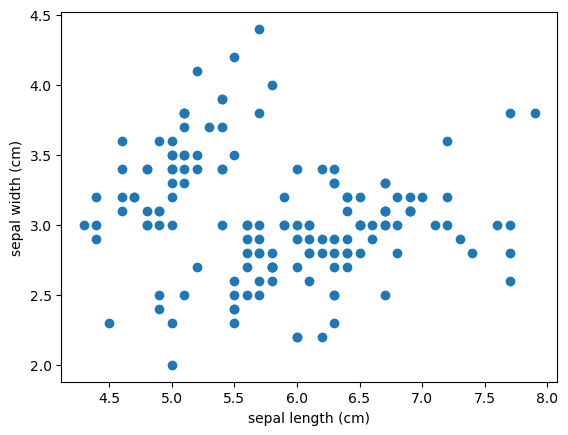

In [6]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [7]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [9]:
df['claster']=y_predicted
df.head()

,sepal length (cm),sepal width (cm),claster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


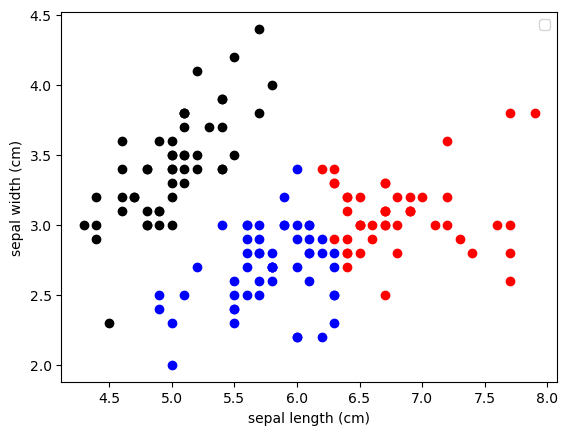

In [10]:
df1 = df[df.claster==0]
df2 = df[df.claster==1]
df3 = df[df.claster==2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

Preprocessing using min max scaler

In [11]:
scaler = MinMaxScaler()

scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])

scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])

In [12]:
df

,sepal length (cm),sepal width (cm),claster
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2
...,...,...,...
145,0.666667,0.416667,1
146,0.555556,0.208333,0
147,0.611111,0.416667,1
148,0.527778,0.583333,1


Text(0, 0.5, 'sepal width (cm)')

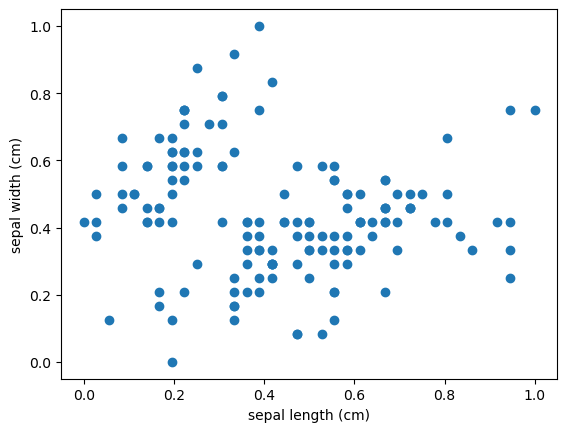

In [13]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [14]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [15]:
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [16]:
df['clster']=y_predicted
df.drop('claster',axis='columns',inplace=True)
df.head()

,sepal length (cm),sepal width (cm),clster
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


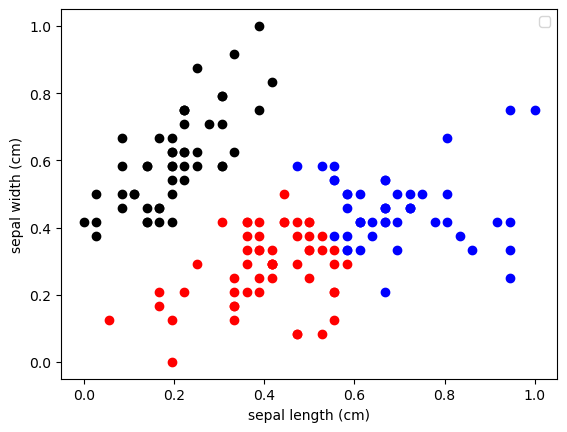

In [17]:
df1 = df[df.clster==0]
df2 = df[df.clster==1]
df3 = df[df.clster==2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

In [18]:
km.cluster_centers_

array([[0.69562648, 0.45390071],
       [0.40483539, 0.28009259],
       [0.19897959, 0.60459184]])

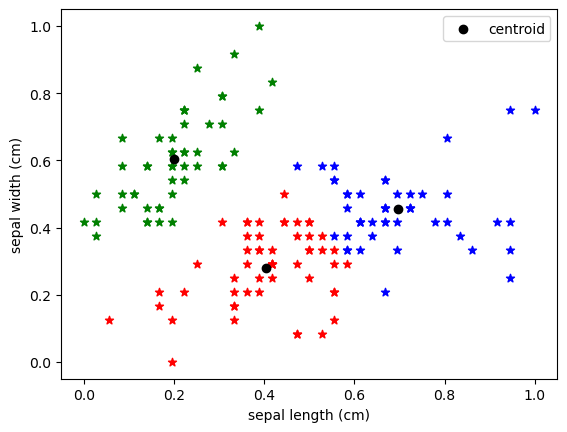

In [21]:
df1 = df[df.clster==0]
df2 = df[df.clster==1]
df3 = df[df.clster==2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='*')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green',marker='*')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='centroid')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

Elbow Plot

In [28]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

In [24]:
sse

[12.797757201646093,
 6.855290526033276,
 4.115194202754066,
 3.2174838565233785,
 2.5735681900263114,
 2.108802442013226,
 1.8151692789405591,
 1.5474600878159905,
 1.269565342813748]

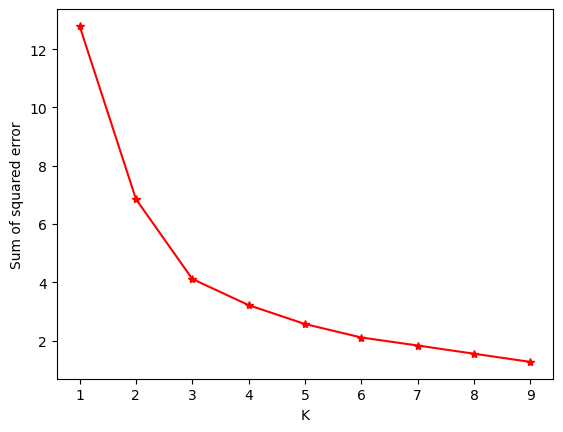

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,color='red',marker='*')